In [3]:
# %load ../plotting.py
# plotting
params = {
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'gray',
    'axes.grid': False,
    'savefig.dpi': 150,
    'axes.labelsize': 30,
    'axes.titlesize': 30,
    'font.size': 30,
    'legend.fontsize': 10,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'text.usetex': True,
    'font.family': 'serif',
}
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(params)
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [5]:
# %load ../analysis/jupyter_imports.py
%load_ext autoreload
%autoreload 2

from pynwb import NWBHDF5IO
import numpy as np
from scipy.signal import correlate
from scipy.io import loadmat, savemat
from math import floor, ceil
# Script to add the entire project directory structure to the python path
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import h5py

# Evaluate the performance of UoI_Lasso as we increase blocking between covariates

In [6]:
dp = 'data/12042018'
fnames = ['block1', 'block2', 'block3', 'block4', 'block5', 'block6', 'block12', 'block20']

In [9]:
files = [h5py.File('%s/%s.h5' % (dp, f), 'r') for f in fnames]

In [10]:
fn = [file['fn'][:] for file in files]
r2 = [file['r2'][:] for file in files]
fp = [file['fp'][:] for file in files]
r2_true = [file['r2_true'][:] for file in files]

In [12]:
fn[0].shape

(50, 3, 1)

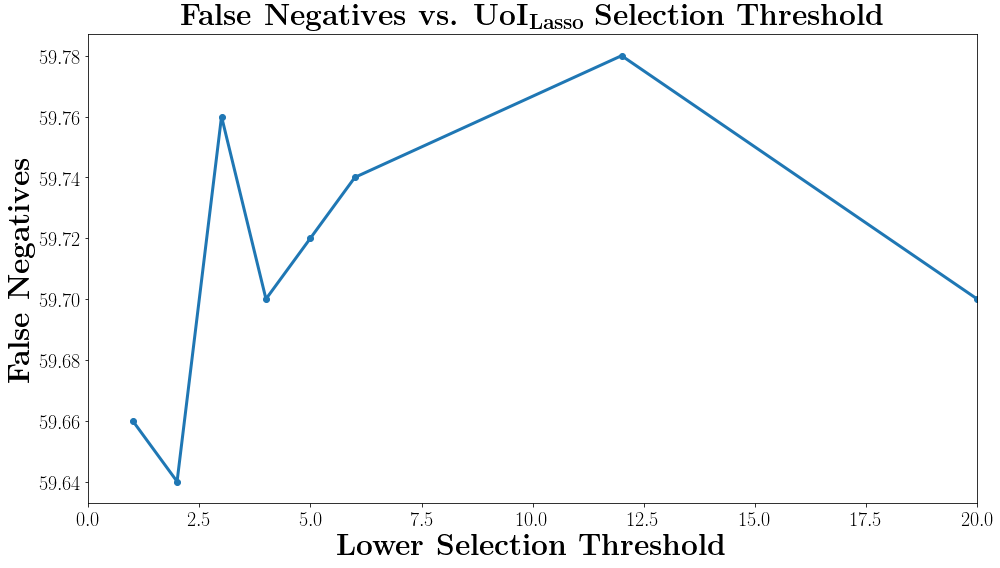

In [16]:
# No correlation within blocks

# Block size
x = [1, 2, 3, 4, 5, 6, 12, 20]
# False negatives
y1 = [np.mean(x[:, 0, 0]) for x in fn]
# False positives
y2 = [np.mean(x[:, 0, 0]) for x in fp]
# R2_score
y3 = [np.mean(x[:, 0, 0]) for x in r2]

fig, ax = plt.subplots(figsize=(14, 8))
ax.errorbar(x, y1, linewidth=3, marker='o')
ax.set_xlim([0, 20])
ax.set_xlabel(r'\textbf{Lower Selection Threshold}')
ax.set_ylabel(r'\textbf{False Negatives}')
ax.set_title(r'\textbf{False Negatives vs. UoI}$_{\mathbf{Lasso}}$ \textbf{Selection Threshold}')
plt.tight_layout()
#plt.savefig('fn_vs_lower_threshold.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [1]:
import numpy as np

In [2]:
M = np.random.random(size = (10, 10))

In [3]:
np.invert(np.tri(10, k = -2) + np.tri(10, k = -2).T)

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [7]:
x = np.invert((np.tri(10, k = -2) + np.tri(10, k = -2).T != 0))

In [8]:
x

array([[ True,  True, False, False, False, False, False, False, False,
        False],
       [ True,  True,  True, False, False, False, False, False, False,
        False],
       [False,  True,  True,  True, False, False, False, False, False,
        False],
       [False, False,  True,  True,  True, False, False, False, False,
        False],
       [False, False, False,  True,  True,  True, False, False, False,
        False],
       [False, False, False, False,  True,  True,  True, False, False,
        False],
       [False, False, False, False, False,  True,  True,  True, False,
        False],
       [False, False, False, False, False, False,  True,  True,  True,
        False],
       [False, False, False, False, False, False, False,  True,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True]])

In [9]:
np.sum(M)

53.21147099967557

In [17]:
x.shape

(5, 3, 5, 5)

In [22]:
x[np.array([4, 2]), ...].shape

(2, 3, 5, 5)

In [18]:
x[np.newaxis, :].shape

(1, 5, 3, 5, 5)

In [25]:
np.take(x, [0, 1])

array([0., 0.])